In [1]:
# Compare Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.utils import shuffle
import warnings
from playsound import playsound
warnings.filterwarnings("ignore", category=FutureWarning)

# Set seed value
np.random.seed(42)

# Read data
data_file = 'encoded_snps_final.csv'
data = pd.read_csv(data_file, sep = ' ')
data = data.drop('usersid', axis=1)
data = data.replace(np.NaN, "0")
snp = data.columns.values
snp = snp[:-1]
X = data[snp].values
Y = data['Class'].values
print("DONE Reading Data")
playsound('beep-07.mp3')

DONE Reading Data


In [15]:
# Training 
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier(n_neighbors=5)
#model = SVC(kernel='linear', C=1, tol=0.002)
#model = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=100)
#model = KNeighborsClassifier(n_neighbors=5)
#model = LogisticRegression(penalty='l2')
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=12)
scores = cross_validate(model, X, Y, cv=10, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))

f1_score = scores['test_f1_macro'].mean()
acc = scores['test_accuracy'].mean()
recall = scores['test_recall_macro'].mean()
precision = scores['test_precision_macro'].mean()

print("F1:")
print(f1_score)
print()
print("accuracy:")
print(acc)
print()
print("recall:")
print(recall)
print()
print("precision:")
print(precision)
print()
playsound('beep-07.mp3')

/Users/nouf/opt/anaconda3/envs/python3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1:
0.43075073075073067

accuracy:
0.4416666666666666

recall:
0.4416666666666666

precision:
0.4830687830687831



    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        3.741264      0.249129         0.115265        0.027903   
1        3.315354      0.238444         0.118042        0.026228   
2        3.607468      0.150669         0.119917        0.050615   
3        3.528449      0.202941         0.098899        0.003918   
4        3.831322      0.224548         0.096529        0.009505   
5        3.411271      0.204465         0.097576        0.009394   
6        3.831339      0.128183         0.097277        0.005772   
7        3.494288      0.144245         0.100767        0.012454   
8        3.204749      0.090081         0.096980        0.007783   
9        2.843015      0.181577         0.098514        0.007509   
10       3.293293      0.126844         0.096501        0.009118   
11       3.205334      0.067746         0.142825        0.066723   
12       3.263322      0.155685         0.092411        0.002757   
13       3.271939      0.325259         0.102118

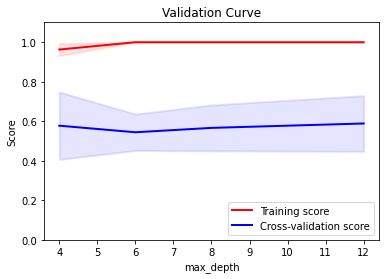

In [50]:
import numbers
def plot_grid_search_validation_curve(grid, param_to_vary,
                                      title='Validation Curve', ylim=None,
                                      xlim=None, log=None):
    """Plots train and cross-validation scores from a GridSearchCV instance's
    best params while varying one of those params."""

    df_cv_results = pd.DataFrame(grid.cv_results_)
    train_scores_mean = df_cv_results['mean_train_score']
    valid_scores_mean = df_cv_results['mean_test_score']
    train_scores_std = df_cv_results['std_train_score']
    valid_scores_std = df_cv_results['std_test_score']

    param_cols = [c for c in df_cv_results.columns if c[:6] == 'param_']
    param_ranges = [grid.param_grid[p[6:]] for p in param_cols]
    param_ranges_lengths = [len(pr) for pr in param_ranges]

    train_scores_mean = np.array(train_scores_mean).reshape(*param_ranges_lengths)
    valid_scores_mean = np.array(valid_scores_mean).reshape(*param_ranges_lengths)
    train_scores_std = np.array(train_scores_std).reshape(*param_ranges_lengths)
    valid_scores_std = np.array(valid_scores_std).reshape(*param_ranges_lengths)

    param_to_vary_idx = param_cols.index('param_{}'.format(param_to_vary))

    slices = []
    for idx, param in enumerate(grid.best_params_):
        if (idx == param_to_vary_idx):
            slices.append(slice(None))
            continue
        best_param_val = grid.best_params_[param]
        idx_of_best_param = 0
        if isinstance(param_ranges[idx], np.ndarray):
            idx_of_best_param = param_ranges[idx].tolist().index(best_param_val)
        else:
            idx_of_best_param = param_ranges[idx].index(best_param_val)
        slices.append(idx_of_best_param)

    train_scores_mean = train_scores_mean[tuple(slices)]
    valid_scores_mean = valid_scores_mean[tuple(slices)]
    train_scores_std = train_scores_std[tuple(slices)]
    valid_scores_std = valid_scores_std[tuple(slices)]

    plt.clf()

    plt.title(title)
    plt.xlabel(param_to_vary)
    plt.ylabel('Score')

    if (ylim is None):
        plt.ylim(0.0, 1.1)
    else:
        plt.ylim(*ylim)

    if (not (xlim is None)):
        plt.xlim(*xlim)

    lw = 2

    plot_fn = plt.plot
    if log:
        plot_fn = plt.semilogx

    param_range = param_ranges[param_to_vary_idx]
    if (not isinstance(param_range[0], numbers.Number)):
        param_range = [str(x) for x in param_range]
    plot_fn(param_range, train_scores_mean, label='Training score', color='r',
            lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='r', lw=lw)
    plot_fn(param_range, valid_scores_mean, label='Cross-validation score',
            color='b', lw=lw)
    plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1,
                     color='b', lw=lw)

    plt.legend(loc='lower right')

    #plt.show()
    plt.savefig(param_to_vary+'_v2.png', dpi=300)

# Determine best hyperparameters bases on accuracy
grid_param = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['best', 'random'],
    'max_depth': [4,6,8,12]
}
# Split the dataset in two parts
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, stratify=Y)
gd_sr = GridSearchCV(estimator=DecisionTreeClassifier(),
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1,
                    return_train_score=True)

gd_sr.fit(X_train, y_train)
print("Best parameters set found on development set:")
print()
print(gd_sr.best_params_)
print()

print("Mean cross-validated score of the best_estimator")
print(gd_sr.best_score_)
print()

df_cv_results = pd.DataFrame(gd_sr.cv_results_)
plot_grid_search_validation_curve(gd_sr, 'criterion')
plot_grid_search_validation_curve(gd_sr, 'splitter')
plot_grid_search_validation_curve(gd_sr, 'max_depth')